In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import nltk
from wordcloud import WordCloud
import spacy
from nltk.sentiment import SentimentIntensityAnalyzer
sns.set_theme(style='darkgrid',palette='rainbow')

# Data

In [2]:
df = pd.read_csv('./Elon_musk.csv',encoding='latin-1',index_col=0)
df

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Cleaning

In [3]:
def clean_twitter_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove mentions (@username)
    text = re.sub(r"@[^\s]+", "", text)

    # Remove hashtags (#hashtag)
    text = re.sub(r"#([^\s]+)", r"\1", text)
    
    # Remove characters inside brackets (<text>, {text}, [text], (text))
    text = re.sub(r"<[^>]+>|\{[^}]+\}|\[[^\]]+\]|\([^)]+\)", "", text)

    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s'.]", "", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text.lower()

# Get Stop words

In [4]:
stop_word = []
with open('./stop.txt','r') as file:
    content = file.readlines()
    for line in content:
        stop_word.append(line.lower())
stop_word = [x.replace('\n','') for x in stop_word]

In [5]:
positive_word = []
with open('./positive-words.txt','r') as file:
    content = file.readlines()
    for line in content:
        positive_word.append(line.lower())
positive_word = [x.replace('\n','') for x in positive_word]

In [6]:
negative_word = []
with open('./negative-words.txt','r') as file:
    content = file.readlines()
    for line in content:
        negative_word.append(line.lower())
negative_word = [x.replace('\n','') for x in negative_word]

# Stop , Pos , Neg

In [7]:
def remove_stop_word(text,stop_word):
    text = clean_twitter_text(text)
    ftext = []
    words = text.split(' ')
    for word in words:
        if (word not in stop_word) and (word != '.'):
            word = word.replace('.','')
            ftext.append(word)
    return ' '.join(ftext)
    

In [8]:
df['Clean'] =  df['Text'].apply(lambda x:remove_stop_word(x,stop_word))
df

,Text,Clean
1,@kunalb11 Im an alien,im alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel
3,@joerogan @Spotify Great interview!,great interview
4,@gtera27 Doge is underestimated,doge underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",true sounds surreal negative propaganda amp ea...
1996,@PPathole Make sure to read ur terms &amp; con...,make read ur terms amp conditions clicking accept
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber


In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
def count_pos(x,positive):
    count = 0
    sen = nlp(x)
    for i in sen:
        if i.lemma_ in positive:
            count += 1
    return count

In [11]:
df['Positive Score'] = df['Clean'].apply(lambda x: count_pos(x,positive_word))
df

,Text,Clean,Positive Score
1,@kunalb11 Im an alien,im alien,0
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel,0
3,@joerogan @Spotify Great interview!,great interview,1
4,@gtera27 Doge is underestimated,doge underestimated,0
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...,2
...,...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",true sounds surreal negative propaganda amp ea...,2
1996,@PPathole Make sure to read ur terms &amp; con...,make read ur terms amp conditions clicking accept,0
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,0
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber,0


In [12]:
def count_neg(x,negative):
    count = 0
    sen = nlp(x)
    for i in sen:
        if i.lemma_ in negative:
            count += 1
    return count

In [13]:
df['Negative Score'] = df['Clean'].apply(lambda x: count_neg(x,negative_word))
df

,Text,Clean,Positive Score,Negative Score
1,@kunalb11 Im an alien,im alien,0,0
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel,0,0
3,@joerogan @Spotify Great interview!,great interview,1,0
4,@gtera27 Doge is underestimated,doge underestimated,0,1
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...,2,0
...,...,...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",true sounds surreal negative propaganda amp ea...,2,2
1996,@PPathole Make sure to read ur terms &amp; con...,make read ur terms amp conditions clicking accept,0,0
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,0,0
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber,0,1


# polarity score

In [14]:
sia = SentimentIntensityAnalyzer()

In [15]:
def get_polarity(text):
    text = clean_twitter_text(text)
    return sia.polarity_scores(text)['compound']

In [16]:
df['Polarity Score'] = df['Clean'].apply(get_polarity)
df

,Text,Clean,Positive Score,Negative Score,Polarity Score
1,@kunalb11 Im an alien,im alien,0,0,0.0000
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel,0,0,0.0000
3,@joerogan @Spotify Great interview!,great interview,1,0,0.6249
4,@gtera27 Doge is underestimated,doge underestimated,0,1,-0.2732
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...,2,0,0.8271
...,...,...,...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",true sounds surreal negative propaganda amp ea...,2,2,-0.0000
1996,@PPathole Make sure to read ur terms &amp; con...,make read ur terms amp conditions clicking accept,0,0,0.3818
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,0,0,0.0000
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber,0,1,-0.7003


In [17]:
def get_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [18]:
df['Sentiment'] = df['Polarity Score'].apply(get_sentiment)
df

,Text,Clean,Positive Score,Negative Score,Polarity Score,Sentiment
1,@kunalb11 Im an alien,im alien,0,0,0.0000,Neutral
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel,0,0,0.0000,Neutral
3,@joerogan @Spotify Great interview!,great interview,1,0,0.6249,Positive
4,@gtera27 Doge is underestimated,doge underestimated,0,1,-0.2732,Negative
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...,2,0,0.8271,Positive
...,...,...,...,...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",true sounds surreal negative propaganda amp ea...,2,2,-0.0000,Neutral
1996,@PPathole Make sure to read ur terms &amp; con...,make read ur terms amp conditions clicking accept,0,0,0.3818,Positive
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,0,0,0.0000,Neutral
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber,0,1,-0.7003,Negative


# Viz


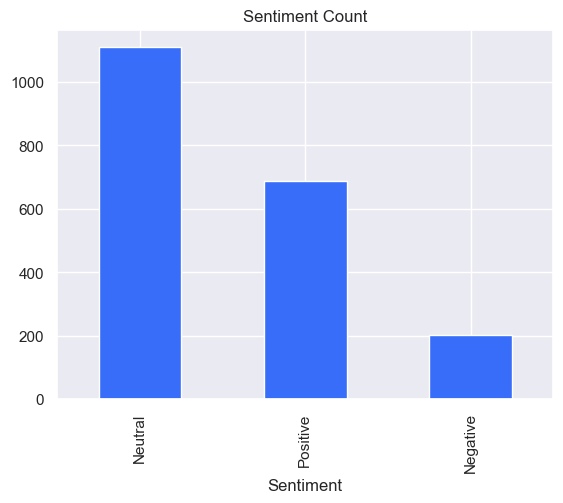

In [19]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Count')
plt.show()

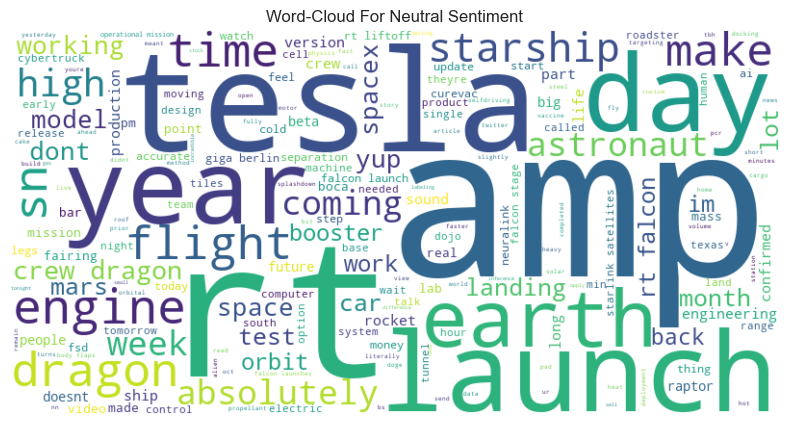

In [20]:
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df['Sentiment']=='Neutral']['Clean']))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word-Cloud For Neutral Sentiment')
plt.show()

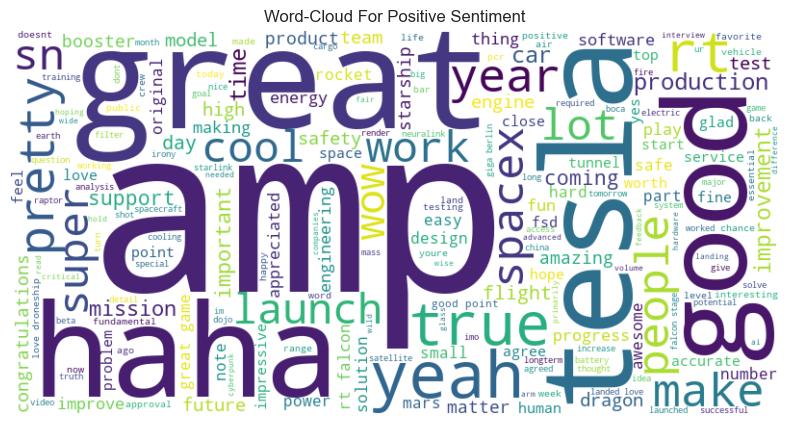

In [21]:
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df['Sentiment']=='Positive']['Clean']))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word-Cloud For Positive Sentiment')
plt.show()

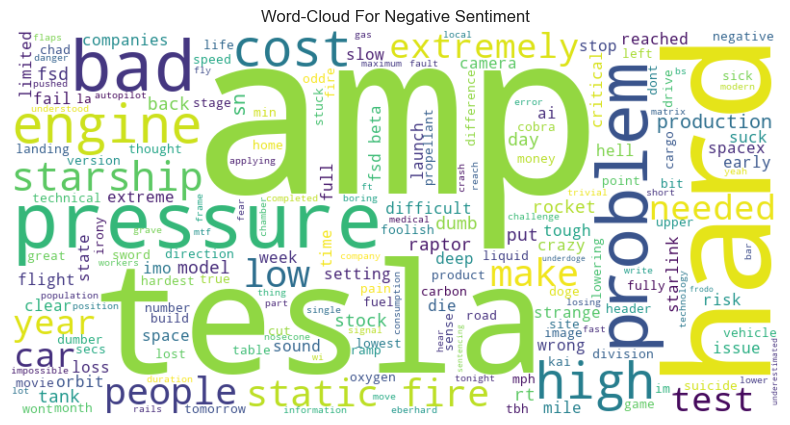

In [22]:
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df['Sentiment']=='Negative']['Clean']))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word-Cloud For Negative Sentiment')
plt.show()